In [743]:
import pandas as pd
import numpy as np
import os
import re
import time
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoAlertPresentException,TimeoutException
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.options import Options
from datetime import date
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.alert import Alert
import pygetwindow as gw
import pyautogui
import matplotlib.pyplot as plt
import math


In [744]:
file_path = r"C:\Users\DELL\Documents\eway\city_files\trichy.xlsx"

In [745]:
#File reading

def file_read(file_path):
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(file_path,sheet_name= xls.sheet_names[-1],header=None)
    return df

In [746]:
df = file_read(file_path)
df

,0,1,2,3,4,5,6,7
0,BHIMA JEWELLERY MADURAI - HO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"196 2ND FLOOR , SUBA SHRI ARUN COMPLEX",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MADURAI - 625016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GSTIN - 33AAIFB1068K1ZJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Delivery Challan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Delivery Challan No,NaN,DC - CHOHB -1789,NaN,NaN,NaN,NaN,NaN
6,Date,NaN,2025-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN
7,Supporting Document No,NaN,CHOHB -1789,NaN,NaN,NaN,NaN,NaN
8,Supporting Document Date,NaN,2025-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN
9,Details of the \nRecipient/Consignee ( Job Wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [747]:
# Clean 

def get_clean(df):
    df = df.dropna(how="all",axis=0).dropna(how="all",axis=1)
    df =df.reset_index(drop=True)
    df.iloc[:,0] = df.iloc[:,0].astype(str).str.replace(r"[\n\t]+"," ",regex=True).str.strip()
    return df

In [748]:
get_clean(df)

,0,1,2,3,4,5,6,7
0,BHIMA JEWELLERY MADURAI - HO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"196 2ND FLOOR , SUBA SHRI ARUN COMPLEX",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MADURAI - 625016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GSTIN - 33AAIFB1068K1ZJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Delivery Challan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Delivery Challan No,NaN,DC - CHOHB -1789,NaN,NaN,NaN,NaN,NaN
6,Date,NaN,2025-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN
7,Supporting Document No,NaN,CHOHB -1789,NaN,NaN,NaN,NaN,NaN
8,Supporting Document Date,NaN,2025-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN
9,Details of the Recipient/Consignee ( Job Worker),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [749]:
#list creation
def get_new_lst(df):
    new_lst = [df.loc[j,i] for i in df.columns for j in df.index]
    new_lst = [str(i).replace('\n','') for i in new_lst]
    new_lst = [x for x in new_lst if x != 'nan']
    return new_lst

In [750]:
get_new_lst(df)

['BHIMA JEWELLERY MADURAI - HO',
 '196 2ND FLOOR , SUBA SHRI ARUN COMPLEX',
 'MADURAI - 625016',
 'GSTIN - 33AAIFB1068K1ZJ',
 'Delivery Challan',
 'Delivery Challan No ',
 'Date ',
 'Supporting Document No ',
 'Supporting Document Date ',
 'Details of the Recipient/Consignee ( Job Worker) ',
 'Name',
 'Address with Pincode',
 'State ',
 'State Code',
 'GSTIN',
 'Sl. No',
 '1',
 'Total',
 'Purpose: STOCK TRANSFER  TO TCY BRANCH',
 'Total Amount in Words',
 'Description of Goods for Job Work with Purpose',
 'NEW GOLD ORNAMENTS',
 'DC - CHOHB -1789',
 '2025-08-22 00:00:00',
 'CHOHB -1789',
 '2025-08-22 00:00:00',
 'BHIMA JEWELLERY TRICHY',
 '32/33 CHINNA KADAI VEEDHI',
 'NSB ROAD',
 'TRICHY',
 'TAMIL NADU',
 '33',
 '33AAIFB1068K1ZJ',
 'HSN Code',
 '71131910',
 'Quantity',
 'Gross Weight(Gms)',
 '345.08',
 '345.08',
 'Stone Weight(CTS]',
 '0',
 'Value of Supply',
 '179117.59',
 'Place of Supply',
 'Net Weight(Gms)',
 '345.08',
 '345.08',
 'GST Rate',
 '0.03',
 '0.18',
 'Grand Total',
 'Rat

In [751]:
data_d = {}

In [752]:
new_lst = get_new_lst(df)
new_lst

['BHIMA JEWELLERY MADURAI - HO',
 '196 2ND FLOOR , SUBA SHRI ARUN COMPLEX',
 'MADURAI - 625016',
 'GSTIN - 33AAIFB1068K1ZJ',
 'Delivery Challan',
 'Delivery Challan No ',
 'Date ',
 'Supporting Document No ',
 'Supporting Document Date ',
 'Details of the Recipient/Consignee ( Job Worker) ',
 'Name',
 'Address with Pincode',
 'State ',
 'State Code',
 'GSTIN',
 'Sl. No',
 '1',
 'Total',
 'Purpose: STOCK TRANSFER  TO TCY BRANCH',
 'Total Amount in Words',
 'Description of Goods for Job Work with Purpose',
 'NEW GOLD ORNAMENTS',
 'DC - CHOHB -1789',
 '2025-08-22 00:00:00',
 'CHOHB -1789',
 '2025-08-22 00:00:00',
 'BHIMA JEWELLERY TRICHY',
 '32/33 CHINNA KADAI VEEDHI',
 'NSB ROAD',
 'TRICHY',
 'TAMIL NADU',
 '33',
 '33AAIFB1068K1ZJ',
 'HSN Code',
 '71131910',
 'Quantity',
 'Gross Weight(Gms)',
 '345.08',
 '345.08',
 'Stone Weight(CTS]',
 '0',
 'Value of Supply',
 '179117.59',
 'Place of Supply',
 'Net Weight(Gms)',
 '345.08',
 '345.08',
 'GST Rate',
 '0.03',
 '0.18',
 'Grand Total',
 'Rat

In [753]:
def get_gst(new_lst):
    gst = ''
    for i in new_lst:
        if str(i).isalnum():
            if str(i).endswith('J'):
                gst = gst+str(i)
    return gst

In [754]:
get_gst(new_lst)

'33AAIFB1068K1ZJ'

In [755]:

def get_hsn(new_lst):
    hsn_lst =[]
    for i in new_lst:
        if str(i).isdigit():
            if str(i).startswith('71'):
                hsn_lst.append(str(i))
    return "".join(hsn_lst)

In [756]:
get_hsn(new_lst)

'71131910'

In [757]:
def get_units(new_lst):
    unit_lst = ""
    for i in new_lst:
        if str(i).startswith('Gross'):
            unit_lst = unit_lst+i
    ind = unit_lst.find('Gms')
    ind_1 = unit_lst[ind:]
    ind_2 = "".join(re.findall('[a-zA-Z]',ind_1))
    return ind_2

In [758]:
get_units(new_lst)

'Gms'

In [759]:
def get_stock_tr(new_lst):
    for i in new_lst:
        if 'STOCK' in str(i):
            stock_str= str(i)
    st_1 = " ".join(stock_str[stock_str.find('STOCK'):].split(" ")[0:2])
    return st_1

In [760]:
get_stock_tr(new_lst)

'STOCK TRANSFER'

In [761]:
data_d['sub_type'] = get_stock_tr(new_lst)

In [762]:
data_d

{'sub_type': 'STOCK TRANSFER'}

In [763]:
def ornaments(new_lst):
    ornaments_lst = []
    for i in new_lst:
        if any(x in str(i) for x in ['ORNAMENTS', 'COIN', 'BULLION']):
            ornaments_lst.append(i)
    if len(ornaments_lst)>1:
        ornments = ornaments_lst.pop()
        ornaments_lst_1 = "".join(ornaments_lst)
        return ornaments_lst_1
    else:
        ornaments_lst_1 = "".join(ornaments_lst)
    return ornaments_lst_1


In [764]:
ornaments(new_lst)

'NEW GOLD ORNAMENTS'

In [765]:
new_d = {i:col for i,col in enumerate(new_lst)}
new_d

{0: 'BHIMA JEWELLERY MADURAI - HO',
 1: '196 2ND FLOOR , SUBA SHRI ARUN COMPLEX',
 2: 'MADURAI - 625016',
 3: 'GSTIN - 33AAIFB1068K1ZJ',
 4: 'Delivery Challan',
 5: 'Delivery Challan No ',
 6: 'Date ',
 7: 'Supporting Document No ',
 8: 'Supporting Document Date ',
 9: 'Details of the Recipient/Consignee ( Job Worker) ',
 10: 'Name',
 11: 'Address with Pincode',
 12: 'State ',
 13: 'State Code',
 14: 'GSTIN',
 15: 'Sl. No',
 16: '1',
 17: 'Total',
 18: 'Purpose: STOCK TRANSFER  TO TCY BRANCH',
 19: 'Total Amount in Words',
 20: 'Description of Goods for Job Work with Purpose',
 21: 'NEW GOLD ORNAMENTS',
 22: 'DC - CHOHB -1789',
 23: '2025-08-22 00:00:00',
 24: 'CHOHB -1789',
 25: '2025-08-22 00:00:00',
 26: 'BHIMA JEWELLERY TRICHY',
 27: '32/33 CHINNA KADAI VEEDHI',
 28: 'NSB ROAD',
 29: 'TRICHY',
 30: 'TAMIL NADU',
 31: '33',
 32: '33AAIFB1068K1ZJ',
 33: 'HSN Code',
 34: '71131910',
 35: 'Quantity',
 36: 'Gross Weight(Gms)',
 37: '345.08',
 38: '345.08',
 39: 'Stone Weight(CTS]',
 40:

In [766]:
def get_grs_wt(new_d):
    gross_wt = ''
    for x in new_d:
        if new_d[x].startswith('Gross'):        
            gross_wt = str(round(float(gross_wt+new_d[x+1]),2))
            
    return gross_wt

In [767]:
get_grs_wt(new_d)

'345.08'

In [768]:
def get_value(new_d):
    value = ''
    for x in new_d:
        if new_d[x].startswith('Value of Supply'):        
            value = value+new_d[x+1]
    value_1 = float(value)
    value_2 = round(value_1,2)
    value_3 = str(value_2)
    type(value_3)
    value = value_3
    return value

In [769]:
get_value(new_d)

'179117.59'

In [770]:
new_d

{0: 'BHIMA JEWELLERY MADURAI - HO',
 1: '196 2ND FLOOR , SUBA SHRI ARUN COMPLEX',
 2: 'MADURAI - 625016',
 3: 'GSTIN - 33AAIFB1068K1ZJ',
 4: 'Delivery Challan',
 5: 'Delivery Challan No ',
 6: 'Date ',
 7: 'Supporting Document No ',
 8: 'Supporting Document Date ',
 9: 'Details of the Recipient/Consignee ( Job Worker) ',
 10: 'Name',
 11: 'Address with Pincode',
 12: 'State ',
 13: 'State Code',
 14: 'GSTIN',
 15: 'Sl. No',
 16: '1',
 17: 'Total',
 18: 'Purpose: STOCK TRANSFER  TO TCY BRANCH',
 19: 'Total Amount in Words',
 20: 'Description of Goods for Job Work with Purpose',
 21: 'NEW GOLD ORNAMENTS',
 22: 'DC - CHOHB -1789',
 23: '2025-08-22 00:00:00',
 24: 'CHOHB -1789',
 25: '2025-08-22 00:00:00',
 26: 'BHIMA JEWELLERY TRICHY',
 27: '32/33 CHINNA KADAI VEEDHI',
 28: 'NSB ROAD',
 29: 'TRICHY',
 30: 'TAMIL NADU',
 31: '33',
 32: '33AAIFB1068K1ZJ',
 33: 'HSN Code',
 34: '71131910',
 35: 'Quantity',
 36: 'Gross Weight(Gms)',
 37: '345.08',
 38: '345.08',
 39: 'Stone Weight(CTS]',
 40:

In [771]:
def doc_number(new_d):
    for x in new_d:
        if 'DC' in new_d[x]:
            doc_no = new_d[x]
    doc_no_1 = doc_no.split("-")
    doc_no_2 = [i.strip() for i in doc_no_1]
    doc_no_3 = doc_no_2[1:]
    doc_no_4 = "-".join(doc_no_3)
    return doc_no_4

In [772]:
doc_number(new_d)

'CHOHB-1789'

In [773]:
def  from_city(new_d):
    for x in new_d:
        if '625016' in new_d[x]:
            city = new_d[x]
    cty = city.split("-")
    place= cty[0].strip()
    return place

In [774]:
from_city(new_d)

'MADURAI'

In [775]:
def from_add_1(new_d):
    for x in new_d:
        if 'MADURAI - HO' in new_d[x]:
            address =  new_d[x+1]
        ad = address.split(",")
        add_1 = ad[0].strip()
    return add_1

In [776]:
from_add_1(new_d)

'196 2ND FLOOR'

In [777]:
def from_add_2(new_d):
    for x in new_d:
        if 'MADURAI - HO' in new_d[x]:
            address =  new_d[x+1]
        ad = address.split(",")
        add_2 = ad[1].strip()
    return add_2


In [778]:
from_add_2(new_d)

'SUBA SHRI ARUN COMPLEX'

In [779]:
def get_pincode(new_d):
    for x in new_d:
        if '625016' in new_d[x]:
            city = new_d[x]
    cty = city.split("-")
    place= cty[0].strip()
    pin_code = cty[1].strip()
    return pin_code

In [780]:
get_pincode(new_d)

'625016'

In [781]:
def get_to_ffice(new_d):
    to_office = []
    for x in new_d:
        if "BHIMA" in new_d[x]:
            to_office.append(new_d[x])
    for i in to_office:
        if 'HO' in i:
            to_office.remove(i)
    to_office_1 = "".join(to_office).strip()
    return to_office_1

In [782]:
get_to_ffice(new_d)

'BHIMA JEWELLERY TRICHY'

In [783]:
def get_to_office_add_1(new_d):
    n = get_to_ffice(new_d)
    for  x in new_d:
        if n in new_d[x]:
            to_office_add_1 = new_d[x+1].strip()
            to_office_add_1 = re.sub(r'[^A-Za-z0-9]+'," ",to_office_add_1)
        
    return to_office_add_1

In [784]:
get_to_office_add_1(new_d)

'32 33 CHINNA KADAI VEEDHI'

In [785]:
def get_to_office_add_2(new_d):
    n = get_to_ffice(new_d)
    for x in new_d:
        if n in new_d[x]:
            to_office_add_2 = new_d[x+2].strip()
            to_office_add_2 = re.sub(r'[^A-Za-z0-9]+'," ",to_office_add_2)
    return to_office_add_2

In [786]:
get_to_office_add_2(new_d)

'NSB ROAD'

In [787]:
def get_city_name(new_d):
    n = get_to_ffice(new_d)
    city_name = "".join(n).split()[-1]
    city_names =[new_d[x] for x in new_d if city_name in new_d[x]]
    return city_names

In [788]:
get_city_name(new_d)

['BHIMA JEWELLERY TRICHY', 'TRICHY']

In [789]:
def to_office_city(new_d):
    s = get_city_name(new_d)
    if len(s)>1:
        data_d['to_office_city'] = s[-1].strip()
    else:
        data_d['to_office_city'] = "".join(s).split()[-1].strip()
    m_1 = data_d['to_office_city'] = re.sub(r'[^a-zA-Z]','',data_d['to_office_city']).strip()
    return m_1

In [790]:
to_office_city(new_d)

'TRICHY'

In [791]:
data_d['gross_wt'] = get_grs_wt(new_d)
data_d['gst_no'] = get_gst(new_lst)
data_d['units'] = get_units(new_lst)
data_d['hsn'] = get_hsn(new_lst)
data_d['value'] = get_value(new_d)
data_d['doc_no'] = doc_number(new_d)
data_d['from_city'] = from_city(new_d)
data_d['from_office_add_1'] = from_add_1(new_d)
data_d['from_office_add_2'] = from_add_2(new_d)
data_d['from_city_pincode'] = get_pincode(new_d)
data_d['to_office'] = get_to_ffice(new_d)
data_d['to_office_add_1'] = get_to_office_add_1(new_d)
data_d['to_office_add_2'] = get_to_office_add_2(new_d)
data_d['to_office_city'] = to_office_city(new_d)
data_d['item'] = ornaments(new_lst)

In [792]:
if data_d['to_office_city'] == 'MADURAI':
    data_d['to_office_add_1'] = '137'
    data_d['to_office_add_2'] = 'WEST MASI STREET'
else:
    data_d['to_office_add_1'] = data_d['to_office_add_1']
    data_d['to_office_add_2'] = data_d['to_office_add_2'] 


In [793]:
city_lst = ['MADURAI', 'RAJPALAYAM', 'DINDIGUL', 'TRICHY', 'SALEM','RAJAPALYAM','RAJAPALAYAM','DINDUGAL']

In [794]:
pincode_d = {'TRICHY' : '620002',
'MADURAI' : '625001',
'RAJAPALYAM':'626117',
'DINDIGUL':'624001',
'DINDUGUL':'624001',
'RAJAPALAYAM':'626117',
'RAJPALAYAM':'626117'}


In [795]:
def  get_pin(data_d,city_lst):
    if data_d['to_office_city'] in city_lst:
        new = data_d['pincode'] = pincode_d[data_d['to_office_city']]
        return new


In [796]:
get_pin(data_d,city_lst)

'620002'

In [797]:
data_d

{'sub_type': 'STOCK TRANSFER',
 'to_office_city': 'TRICHY',
 'gross_wt': '345.08',
 'gst_no': '33AAIFB1068K1ZJ',
 'units': 'Gms',
 'hsn': '71131910',
 'value': '179117.59',
 'doc_no': 'CHOHB-1789',
 'from_city': 'MADURAI',
 'from_office_add_1': '196 2ND FLOOR',
 'from_office_add_2': 'SUBA SHRI ARUN COMPLEX',
 'from_city_pincode': '625016',
 'to_office': 'BHIMA JEWELLERY TRICHY',
 'to_office_add_1': '32 33 CHINNA KADAI VEEDHI',
 'to_office_add_2': 'NSB ROAD',
 'item': 'NEW GOLD ORNAMENTS',
 'pincode': '620002'}

In [798]:
def get_df(data_d):
    df_1= pd.DataFrame(list(data_d.items()),columns=['Items','Values'])
    return df_1

In [799]:
get_df(data_d)

,Items,Values
0,sub_type,STOCK TRANSFER
1,to_office_city,TRICHY
2,gross_wt,345.08
3,gst_no,33AAIFB1068K1ZJ
4,units,Gms
5,hsn,71131910
6,value,179117.59
7,doc_no,CHOHB-1789
8,from_city,MADURAI
9,from_office_add_1,196 2ND FLOOR


In [800]:
def selenium_setup():
    # 1.Selemium setup
    chrome_options = Options()

    # disable automation controlled message
    chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
    chrome_options.add_experimental_option('useAutomationExtension', False)

    # optionally mask webdriver property
    chrome_options.add_argument("--disable-blink-features=AutomationControlled")

    driver = webdriver.Chrome(service=Service("chromedriver.exe"), options=chrome_options)
    #driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get("https://ewaybillgst.gov.in")
    wait =WebDriverWait(driver,20)

    # 2. Click login click

    login_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT,"Login")))
    login_link.click()

    # 3.Fill Form

    user_name_input = wait.until(EC.presence_of_element_located((By.ID, "txt_username")))
    password_input = driver.find_element(By.ID,'txt_password')
    captcha_input = driver.find_element(By.ID, 'txtCaptcha')

    user_name_input.send_keys('BHIMAMADURAI')
    password_input.send_keys('Eway@1234')

    # 4. Capture Captcha

    captcha_img = wait.until(EC.presence_of_element_located((By.XPATH, "//img[contains(@src, 'Captcha')]")))

    #5. Save Captcha ScreenShot

    captcha_img.screenshot("captcha.png")
    print('Catcha image saved as png')

    # 6.Show Captcha to user
    input_image = Image.open('captcha.png')
    plt.imshow(input_image)
    plt.axis("off")  # Hide axis
    plt.show()


    # 7. Entering the Captcha manually

    captcha_value = input('Enter the captcha')
    captcha_input.send_keys(captcha_value)

    # 8.Click Login

    login_button = driver.find_element(By.ID,'btnLogin')
    login_button.click()

    # 9.OTp field

    try:
        WebDriverWait(driver,5).until(EC.alert_is_present())
        alert = driver.switch_to.alert
        print("Alert Text:",alert.text)
        alert.accept()
        print("✅ Alert handled, proceeding...")
    except NoAlertPresentException:
        print('No Alert Appeared')

    otp_input = wait.until(EC.presence_of_element_located((By.ID, "OtpTxt")))
    otp_value = input('Enter the OTP')
    otp_input.send_keys(otp_value)

    # 10. Click Submit button

    otp_submit_btn = driver.find_element(By.ID, "btnsubmit")
    otp_submit_btn.click()

    print("✅ OTP submitted successfully")

    # --- Navigate to EWB for Gold ---
    ewaybill_menu = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "e-Waybill")))
    ewaybill_menu.click()

    ewb_gold_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "EWB for Gold")))
    ewb_gold_link.click()

    outward_radio = wait.until(EC.element_to_be_clickable((By.ID, "ctl00_ContentPlaceHolder1_rbtOutwardInward_0")))
    outward_radio.click()
    print(outward_radio.is_selected())

    others_radio = wait.until(EC.element_to_be_clickable((By.ID, "ctl00_ContentPlaceHolder1_rbtOutSubType_8")))
    others_radio.click()
    print(others_radio.is_selected())

    others_input = wait.until(EC.presence_of_element_located((By.ID, "txtSpecify")))
    others_input.send_keys(data_d['sub_type'])
    print('Successefully Entered')

    doc_type_dropdown = wait.until(EC.presence_of_element_located((By.ID, "ddlDocType")))
    select = Select(doc_type_dropdown)
    select.select_by_value('CHL')
    print("Document Type set to Delivery Challan")

    doc_no_input = wait.until(EC.presence_of_element_located((By.ID, "txtDocNo")))
    doc_no_input.clear()
    doc_no_input_value  = data_d['doc_no']
    doc_no_input.send_keys(doc_no_input_value)
    print('Successfully Entered')

    current_date = date.today()
    formatted_date = current_date.strftime("%d/%m/%Y")
    current_date = date.today()
    formatted_date = current_date.strftime("%d/%m/%Y")
    date_input = wait.until(EC.presence_of_element_located((By.ID, 'txtDocDate')))
    date_input.send_keys(formatted_date)
    date_input.send_keys(Keys.TAB)
    print("Document Date entered:", formatted_date)

    trans_type = wait.until(EC.presence_of_element_located((By.ID, "ddlTransType")))
    select = Select(trans_type)
    select.select_by_value('1')
    print("Transction_type set to Regular")

    firm_name_input = wait.until(EC.presence_of_element_located((By.ID, "ctl00_ContentPlaceHolder1_txtFromTrdName")))
    firm_name_input.clear()
    firm_name_input.send_keys("BHIMA JEWELLERY MADURAI - HO")
    print('Successfully entered')

    addrss_1_input = wait.until(EC.presence_of_element_located((By.ID, "txtFromAddr1")))
    addrss_1_input.clear()
    addrss_1_input.send_keys(data_d['from_office_add_1'])
    print('Successfully entered')

    addrss_2_input = wait.until(EC.presence_of_element_located((By.ID, "txtFromAddr2")))
    addrss_2_input.clear()
    addrss_2_input.send_keys(data_d['from_office_add_2'])
    print('Successfully entered')

    pincode_input = wait.until(EC.presence_of_element_located((By.ID, "ctl00_ContentPlaceHolder1_txtFromPincode")))
    pincode_input.clear()
    pincode_input.send_keys(data_d['from_city_pincode'])

    time.sleep(2)

    to_firm_gstnum_input = wait.until(EC.presence_of_element_located((By.ID, "ctl00_ContentPlaceHolder1_txtToGSTIN")))
    #to_firm_gstnum_input.clear()
    to_firm_gstnum_input.send_keys(data_d['gst_no'])
    print('Successfully entered')

    time.sleep(4)

    to_name_input = wait.until(EC.presence_of_element_located((By.ID, "ctl00_ContentPlaceHolder1_txtToTrdName")))
    to_name_input.clear()
    to_name_input_value  = data_d['to_office']
    to_name_input.send_keys(to_name_input_value.upper())
    print('Successfully entered')

    to_office_add_1_input = wait.until(EC.presence_of_element_located((By.ID, "txtToAddr1")))
    to_office_add_1_input.clear()
    to_office_add_1_input_value = data_d['to_office_add_1']
    to_office_add_1_input.send_keys(to_office_add_1_input_value)

    to_office_add_2_input = wait.until(EC.presence_of_element_located((By.ID, "txtToAddr2")))
    to_office_add_2_input.clear()
    to_office_add_2_input.send_keys(data_d['to_office_add_2'])

    to_place_input = wait.until(EC.presence_of_element_located((By.ID, "ctl00_ContentPlaceHolder1_txtToPlace")))
    to_place_input.clear()
    to_place_input.send_keys(data_d['to_office_city'])

    to_pincode_input = wait.until(EC.presence_of_element_located((By.ID, "ctl00_ContentPlaceHolder1_txtToPincode")))
    to_pincode_input.clear()
    to_pincode_input.send_keys(data_d['pincode'])

    time.sleep(2)

    item = data_d['item']
    pdt_inpt = wait.until(EC.presence_of_element_located((By.ID, "txtProductName_1")))
    pdt_inpt.clear()
    pdt_inpt.send_keys(item)
    #pdt_inpt.send_keys(Keys.RETURN)
    pdt_inpt.send_keys(Keys.TAB)

    item_des = wait.until(EC.presence_of_element_located((By.ID, "txt_Description_1")))
    item_des.clear()
    item_des.send_keys(item)
    item_des.send_keys(Keys.TAB)

    hsn_inpt = wait.until(EC.presence_of_element_located((By.ID, "txt_HSN_1")))
    hsn_inpt.clear()
    hsn_inpt.send_keys(data_d['hsn'])
    hsn_inpt.send_keys(Keys.TAB)

    quant = data_d['gross_wt']
    quant_inpt = wait.until(EC.presence_of_element_located((By.ID, "txt_Quanity_1")))
    quant_inpt.clear()
    quant_inpt.send_keys(quant)
    quant_inpt.send_keys(Keys.TAB)

    units = wait.until(EC.presence_of_element_located((By.ID, "txt_Unit_1")))
    units.clear()
    units.send_keys(data_d['units'])
    units.send_keys(Keys.TAB)

    value_inpt= float(data_d['value'])
    value = wait.until(EC.presence_of_element_located((By.ID, "txt_TRC_1")))
    value.clear()
    value.send_keys(value_inpt)
    value.send_keys(Keys.TAB)

    tax_select = wait.until(EC.presence_of_element_located((By.ID, "SelectCSGST_1")))
    # Use Select helper
    select = Select(tax_select)
    select.select_by_value("1.500")
    time.sleep(4)

    # Wait for CGST field value after taxable entered
    cgst_inpt = wait.until(EC.presence_of_element_located((By.ID, "txtCGST")))
    sgst_inpt = wait.until(EC.presence_of_element_located((By.ID, "txtSGST")))

    # Read the auto-filled values
    cgst_val = cgst_inpt.get_attribute("value")
    sgst_val = sgst_inpt.get_attribute("value")

    # Convert to float safely
    if cgst_val:
        cgst_val = int(round(float(cgst_val),0))
    if sgst_val:
        sgst_val = int(round(float(sgst_val),0))

    time.sleep(3)

    grand_total = wait.until(EC.presence_of_element_located((By.ID, "txtTotInvVal")))
    grand_tot_val = grand_total.get_attribute("value")
    grand_tot_val = math.floor(float(grand_tot_val))
    grand_total.clear()
    grand_total.send_keys(str(grand_tot_val))

    time.sleep(2)

    print("✅ Form filled successfully")

    print("✅ Automation completed") 

Catcha image saved as png


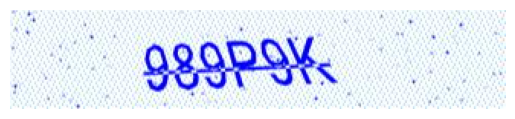

Alert Text: OTP has been sent to your registered mobile number as SMS/Sandes.
✅ Alert handled, proceeding...
✅ OTP submitted successfully
True
True
Successefully Entered
Document Type set to Delivery Challan
Successfully Entered
Document Date entered: 01/09/2025
Transction_type set to Regular
Successfully entered
Successfully entered
Successfully entered
Successfully entered
Successfully entered
✅ Form filled successfully
✅ Automation completed


In [801]:
selenium_setup()